In [1]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
from processXYZLines import processXYZLines
from processUVWLines import processUVWLines
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import RANSACRegressor
from skimage.measure import LineModelND, ransac

In [2]:
#This version uses the XYZ csv



#data_csv_xyz = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25

data_csv_xyz = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_xyz.readCSV()

entry_nr = 12

singular_entry_xyz = data_csv_xyz.m_data[data_csv_xyz.m_data["entry_nr"]==entry_nr]


if singular_entry_xyz.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  12  was found in the 'entry_nr' column.


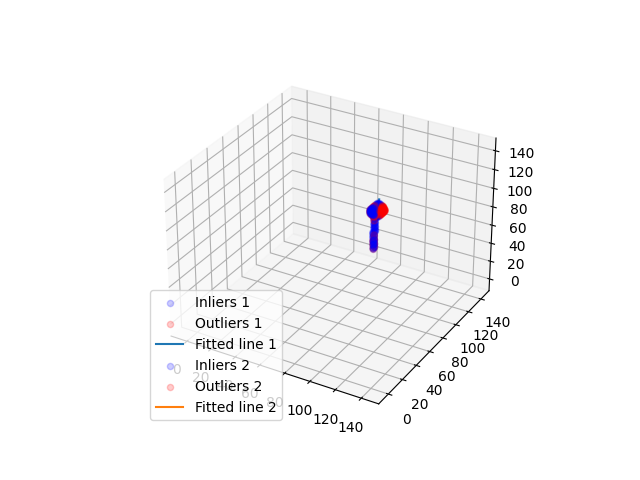

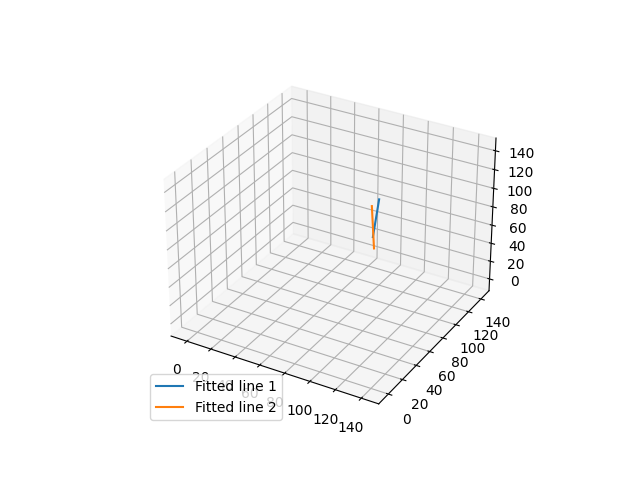

In [3]:
#Use RANSAC in 3D to fit a line to the data set. Format is XYZ.
%matplotlib widget
line_proc_xyz = processXYZLines(singular_entry_xyz)

nr_lines=2


fig = plt.figure()
line_proc_xyz.fitNLines(fig, nr_lines, False, 4, 2.5)




fig_scat = plt.figure()
line_proc_xyz.fitNLines(fig_scat, nr_lines, True, 4, 2.5)

plt.show()

In [4]:
#This version uses the UVW csv

#data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25

data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_uvw.readCSV()

entry_nr = 12

singular_entry_uvw = data_csv_uvw.m_data[data_csv_uvw.m_data["entry_nr"]==entry_nr]


if singular_entry_uvw.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  12  was found in the 'entry_nr' column.


Couldn't fit any more lines for plane U at i =  1


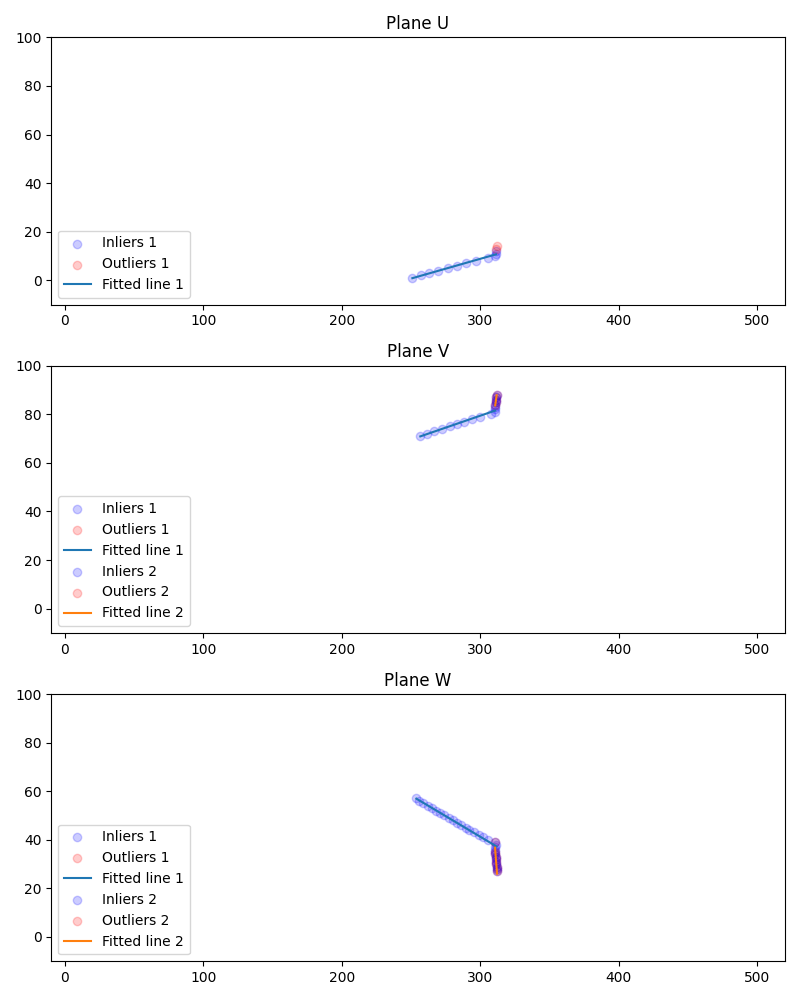

(3,)


/home/gant/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [9]:
#Use RANSAC in 2D to fit a line to the data set. Format is UVW.
line_proc_uvw = processUVWLines(singular_entry_uvw)

nr_lines=2

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_uvw = line_proc_uvw.fitNLines(fig, axes, nr_lines, True, 3, 1.25)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()